#**Importing the Required Libraries**

In [1]:
# Importing os to create a helper variable, which allows us to easily manage different paths in the code
import os

In [3]:
# glob is used to return all file paths that match a specific pattern.
import glob

In [4]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [5]:
# To clear output in the notebook use clear_output function
# display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Mon Nov  4 19:19:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip.**

In [9]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [10]:
!pip install ultralytics==8.0.0

##Checking whether YOLOv8 is Installed and its working fine

In [11]:
import ultralytics

In [12]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/235.7 GB disk)


#**Importing the PPE Detection Dataset from Roboflow**

In [13]:
!mkdir {HOME}/datasets


In [15]:
!pwd

/content/datasets


In [14]:
%cd {HOME}/datasets


/content/datasets


In [16]:
!pwd

/content/datasets


In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hIhYKGrnWHaWXRqZsZg")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
dataset = project.version(1).download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:00<00:00, 6943.28it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [18]:
%cd {HOME}

/content


In [19]:
%cd {dataset.location}

/content/datasets/EEP_Detection-1


If we want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [23]:
os.environ['WANDB_MODE'] = 'disabled'

In [24]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/EEP_Detection-1/data.yaml epochs=90 imgsz=640

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(self.amp):
      74/90      9.89G      0.856     0.5131      1.124         94        640:  37% 53/142 [00:32<00:52,  1.71it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      74/90      9.89G     0.8557     0.5143      1.123        104        640:  38% 54/142 [00:32<00:50,  1.73it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      74/90      9.89G     0.8556     0.5134      1.122        132        640:  39% 55/142 [00:33<00:49,  1.75it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.

In [25]:
!ls {HOME}/runs/detect/train3

args.yaml					    F1_curve.png  predictions.json  results.png
confusion_matrix.png				    P_curve.png   R_curve.png	    weights
events.out.tfevents.1730748605.c53cf5e62cfd.4020.0  PR_curve.png  results.csv


#**Confusion Matrix**

/content


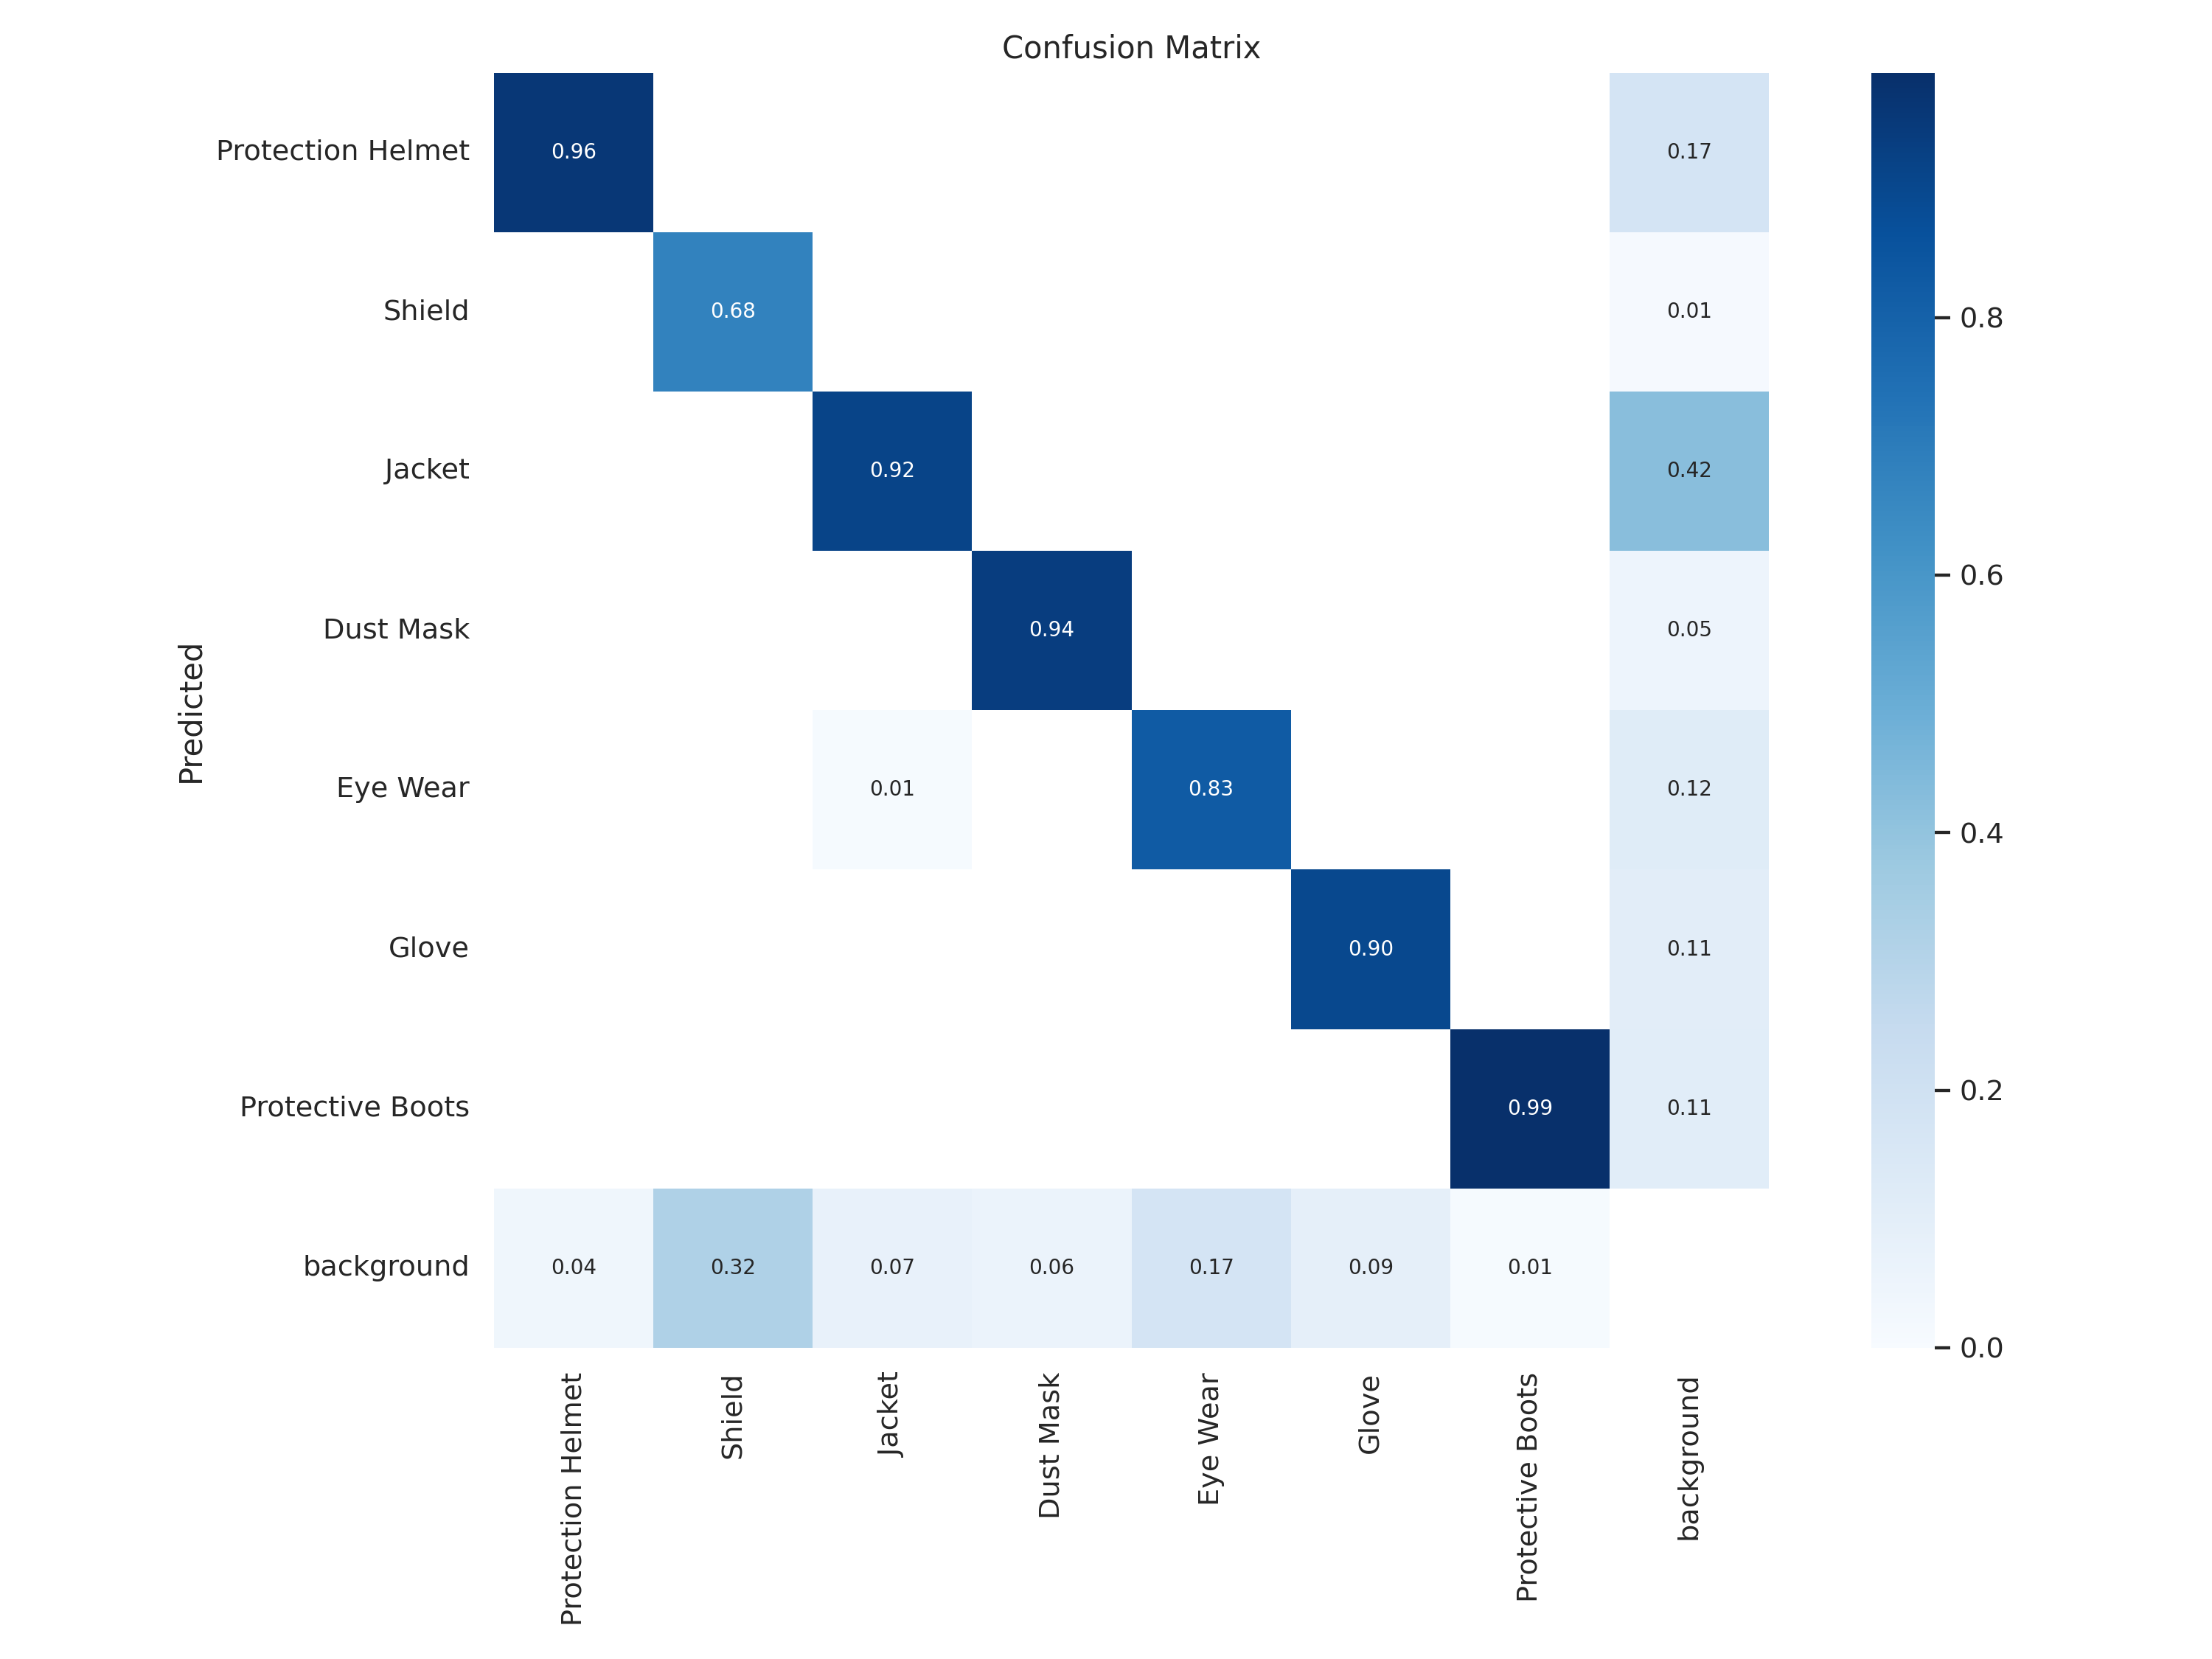

In [27]:
# Confusion matrix is the chart that shows how our model handles different classes
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


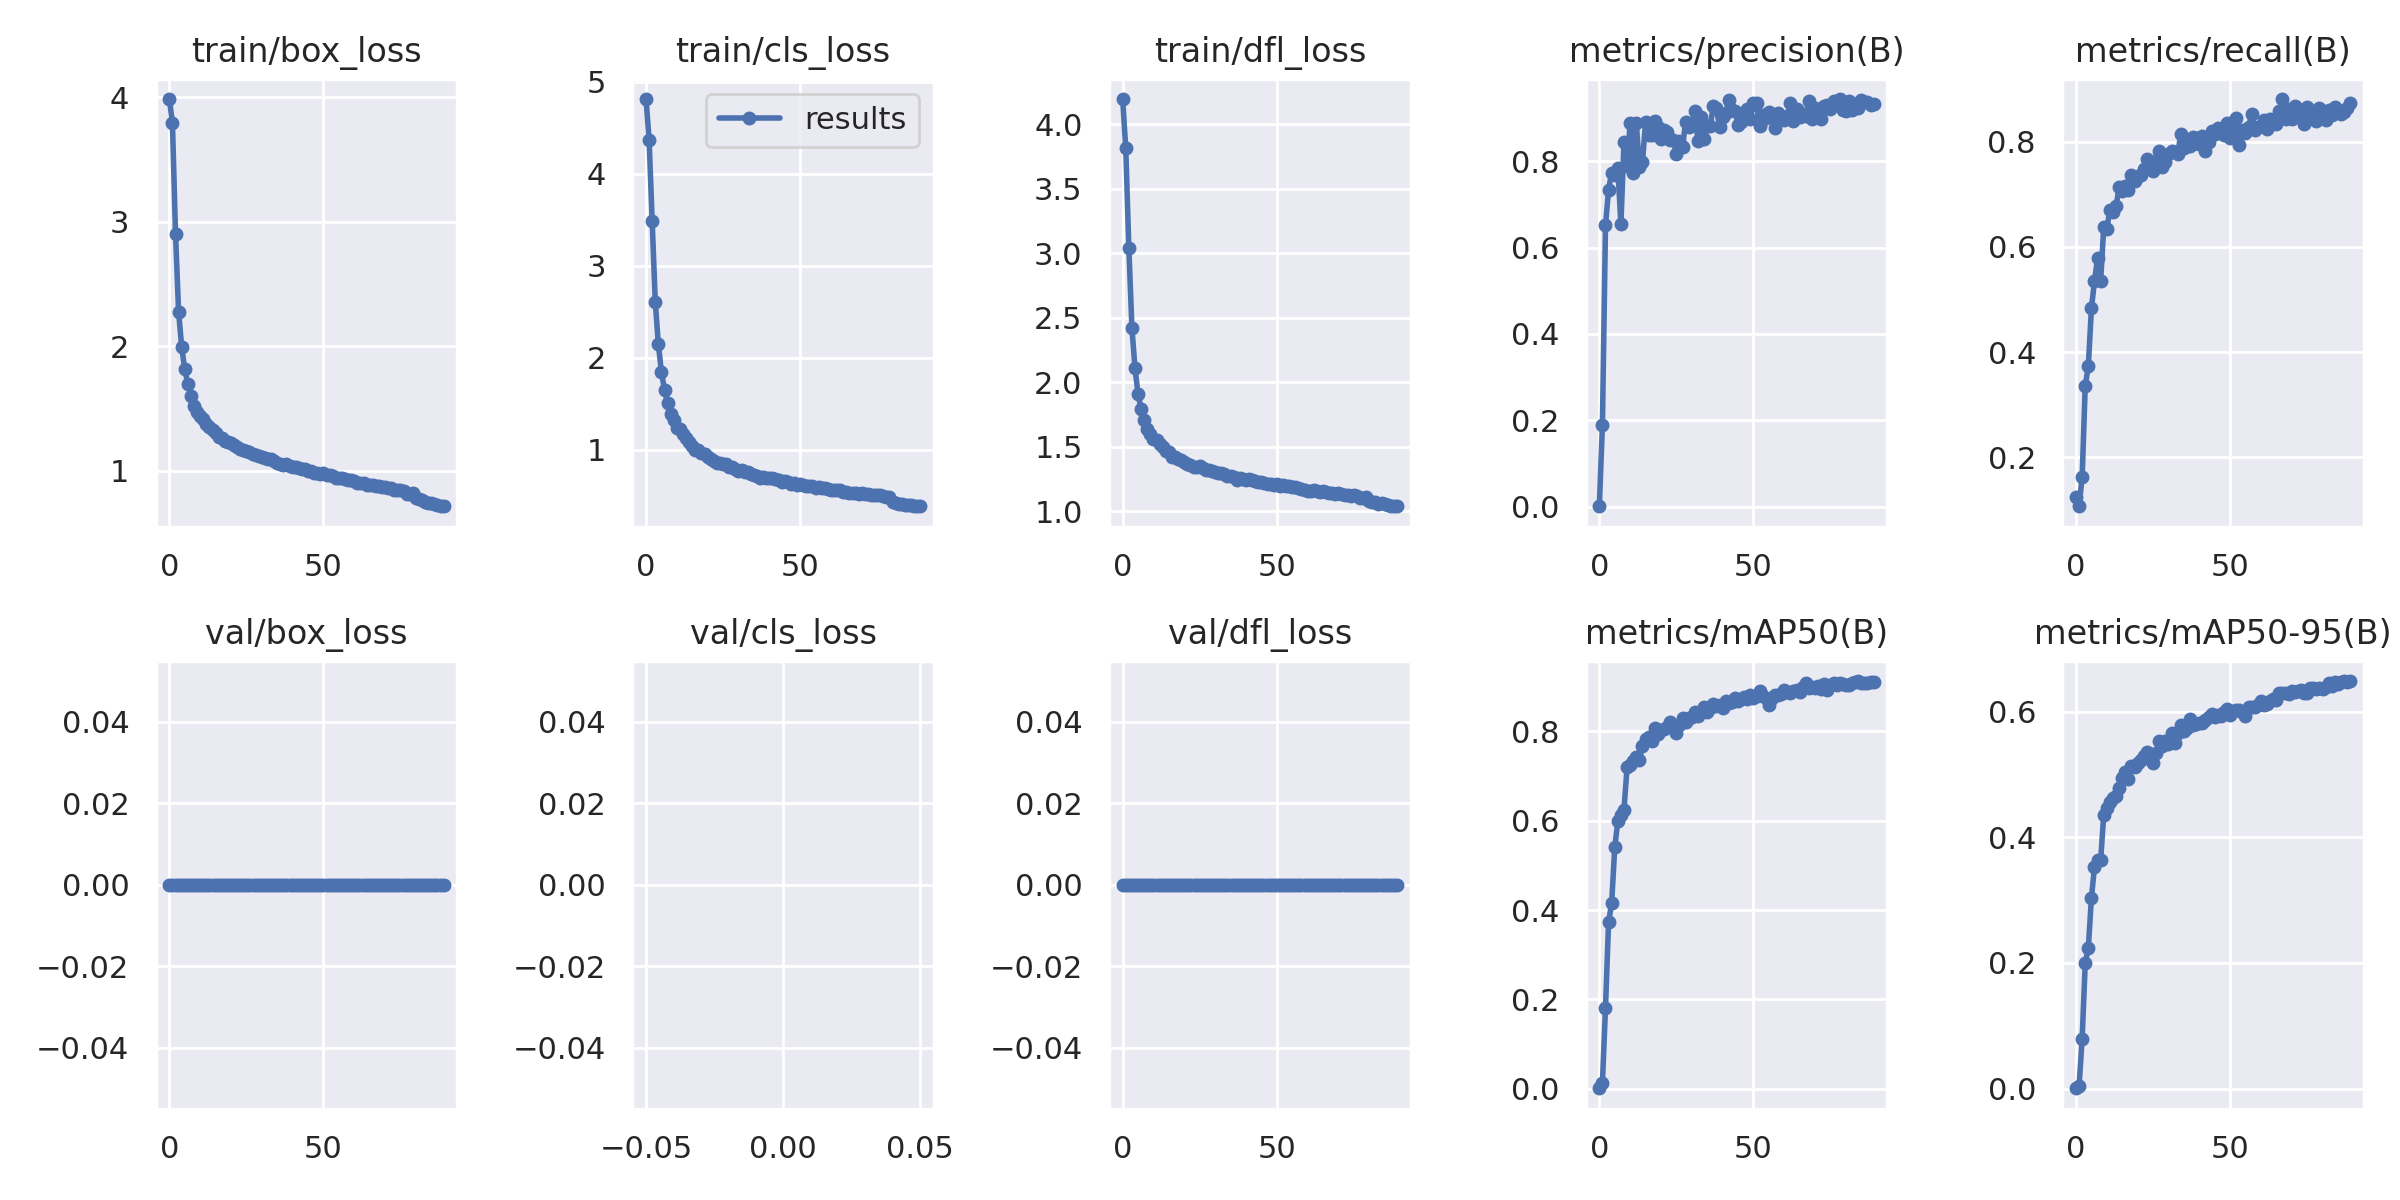

In [28]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

#**Validate Custom Model**

In [30]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml

/content
2024-11-04 22:05:38.914570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 22:05:38.934634: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 22:05:38.940698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 22:05:38.955174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 22:05:40.225916: W tensorflow/com

#**Inference with Custom Model**

In [31]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/datasets/EEP_Detection-1/test/images'

/content
2024-11-04 22:07:31.905796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 22:07:31.925314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 22:07:31.931188: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 22:07:31.945483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 22:07:33.157005: W tensorflow/com

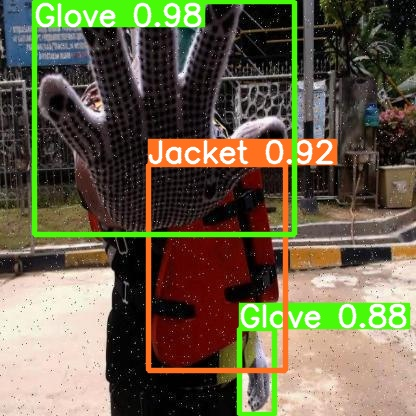

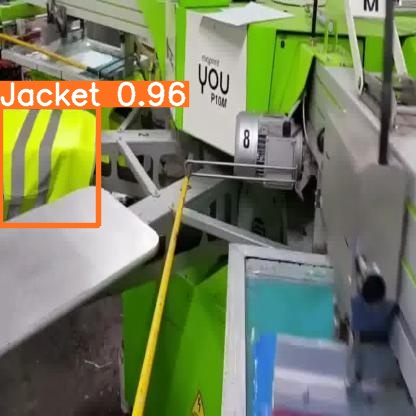

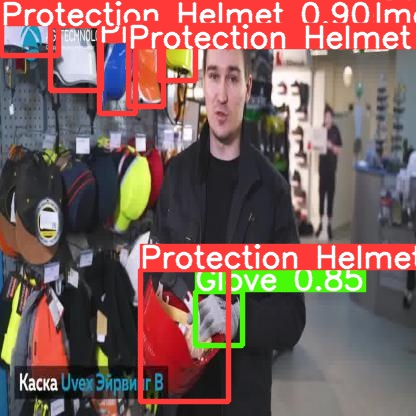

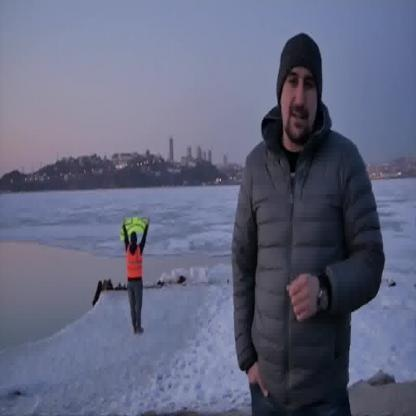

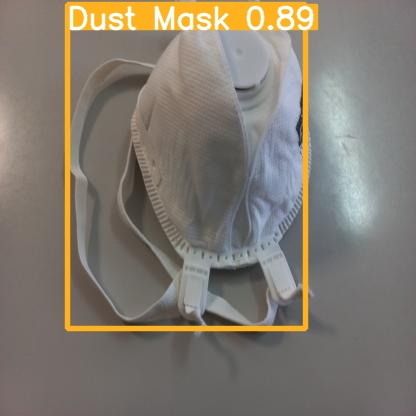

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [33]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/demo.mp4
100% 42.9M/42.9M [00:01<00:00, 42.6MB/s]


In [34]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2024-11-04 22:11:39.107639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 22:11:39.127303: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 22:11:39.133167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 22:11:39.147218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 22:11:40.337140: W tensorflow/com

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict9/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video2**

In [35]:
!gdown "https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t
To: /content/demo3.mp4
100% 20.3M/20.3M [00:00<00:00, 39.2MB/s]


#**Testing on the Demo Video**

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/demo3.mp4'

/content
2024-11-04 22:14:43.267449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 22:14:43.291304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 22:14:43.297513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 22:14:43.311647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 22:14:44.838999: W tensorflow/com

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video3**

In [37]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t
To: /content/demo4.mp4
100% 16.9M/16.9M [00:00<00:00, 85.9MB/s]


#**Testing on the Demo Video**

In [38]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/demo4.mp4'

/content
2024-11-04 22:16:53.016722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 22:16:53.036359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 22:16:53.042361: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 22:16:53.056490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 22:16:54.271028: W tensorflow/com

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)